# Spline Interpolation: Pros when it comes to an accuracy of an approximation

Spline interpolation, due to complexities involved in finding 4 coefficients for each of the (n-1) equations if n points are given is a little challenging to implement, but thankfully, we have a SciPy.Interpolate package to do the job for us.

Below is the code which evaluates the performance of Lagrange, Linear and Spline Interpolations in approximating the function: $y=\frac{1}{1+x^2}$ on the domain x$\epsilon$[-5, 5] with 20 randomly generated points from it.

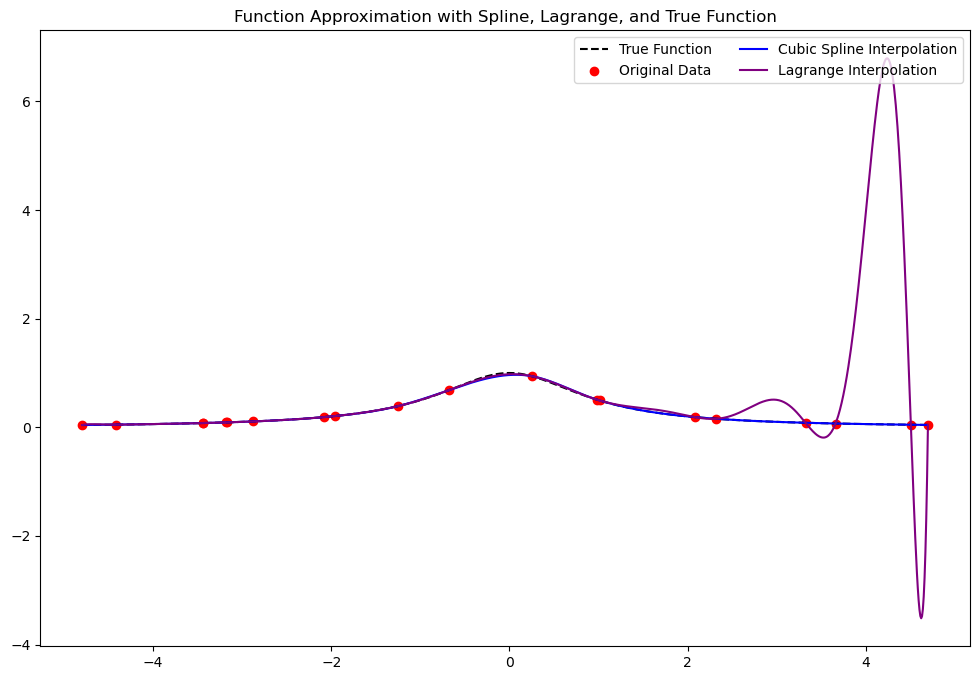

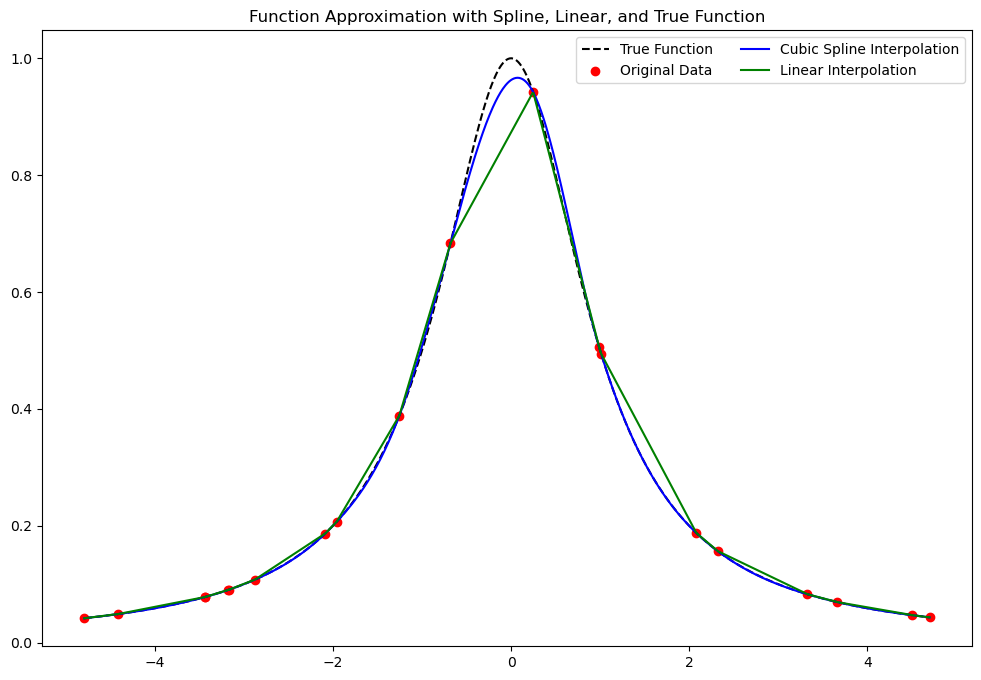

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d, lagrange

plt.rcParams['figure.figsize'] = (12, 8)

# Define the true function
def true_function(x):
    return 1 / (1 + x**2)

# Generate random data points within a range
np.random.seed(42)
num_points = 20
x_data = np.sort(np.random.uniform(-5, 5, num_points))
y_data = true_function(x_data)

# Generate points for visualization within the original data range
xs = np.linspace(min(x_data), max(x_data), 1000)

# Perform cubic spline interpolation
cs = CubicSpline(x_data, y_data)
ys_cubic = cs(xs)

# Perform Lagrange interpolation
lagrange_poly = lagrange(x_data, y_data)
ys_lagrange = lagrange_poly(xs)

#Perform linear interpolation
linear_poly = interp1d(x_data, y_data)
ys_linear = linear_poly(xs)

# Plot the true function
plt.plot(xs, true_function(xs), label='True Function', color='black', linestyle='--')

# Plot the original data points
plt.scatter(x_data, y_data, label='Original Data', color='red')

# Plot cubic spline interpolation
plt.plot(xs, ys_cubic, label="Cubic Spline Interpolation", color='blue')

# Plot Lagrange interpolation
plt.plot(xs, ys_lagrange, label="Lagrange Interpolation", color='purple')

plt.legend(loc='upper right', ncol=2)
plt.title('Function Approximation with Spline, Lagrange, and True Function')
plt.show()

# Plot the true function
plt.plot(xs, true_function(xs), label='True Function', color='black', linestyle='--')

# Plot the original data points
plt.scatter(x_data, y_data, label='Original Data', color='red')

# Plot cubic spline interpolation
plt.plot(xs, ys_cubic, label="Cubic Spline Interpolation", color='blue')

# Plot linear interpolation
plt.plot(xs, ys_linear, label="Linear Interpolation", color='green')

plt.legend(loc='upper right', ncol=2)
plt.title('Function Approximation with Spline, Linear, and True Function')
plt.show()


On the interval approximately (2, 5), we see that Lagrange is experiencing issues. That is due to the fact that for 20 points, Lagrange polynomial is a very high 19th degree polynomial which is forecasted to have unexpected behavior on small intervals. Therefore, function values and integral approximations on that interval are completely unreliable if we consider Lagrange.

Linear interpolation is very computationally and time wise cheap as it is a very simple linear system. For our specific case, it performs solid. Piecewise combination and simplicity makes the model more robust to unexpected shocks like with Lagrange, however, the tradeoff comes with the smoothness of it. It is linear and most real-world functions are smoother, therefore we can do better.

Spline interpolation is the golden middle. Its function is less complex than Lagrange as it's a piecewise combination of cubic polynomials which are smooth and reliable. Just like with the linear interpolation, division of function into subintervals explicitly avoids unexpeceted and deviating from the data behavior. Moreover, as it's differentiable two times, the resulting pieces are very smooth and that is what we aim for. It is more complex than linear interpolation, however the smoothness wins us a lot of accuracy.

## Runge's Phenomenon

Runge's phenomenon is a phenomenon in numerical analysis and interpolation theory that occurs when using high-degree polynomial interpolation to approximate a function, especially when using equidistant interpolation points. Named after the German mathematician Carl David Tolmé Runge, this phenomenon is characterized by oscillations and overshooting in the interpolated function, particularly near the edges of the interpolation interval.

The general idea is that as the degree of the interpolating polynomial increases, the oscillations in the interpolated function become more pronounced, leading to poor approximation, even if the function being approximated is smooth. This is particularly evident when equally spaced interpolation points are used.

Runge's phenomenon again underscores the importance of carefully choosing interpolation methods and number of points depending on the case.

Lagrange interpolation as evidenced before, struggles in such scenarios, while spline can handle if we properly choose the number of points to use for interpolation.

Below, we are addressing Runge's famous counterexample for interpolation: $f(x) = \frac{1}{1 + 25x^2}$.If this function is interpolated at equally spaced points in the interval [-1,1], the polynomials do not converge uniformly. In fact, the maximum error goes to infinity. Let's check it.

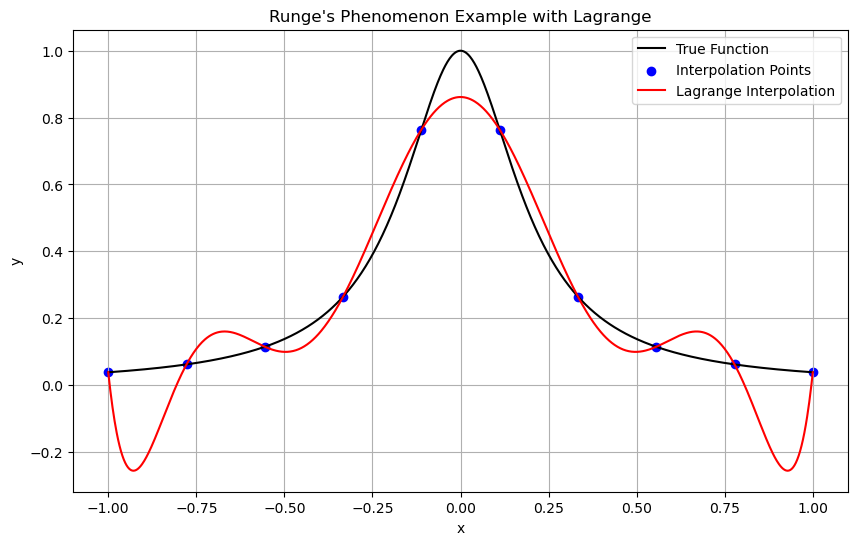

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define the function to be interpolated
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Generate equidistant interpolation points
num_points = 10
interpolation_points = np.linspace(-1, 1, num_points)

# Generate Runge's function values at the interpolation points
function_values = runge_function(interpolation_points)

# Perform Lagrange interpolation using the interpolation points
lagrange_poly = lagrange(interpolation_points, function_values)

# Generate a finer grid for plotting
x_fine = np.linspace(-1, 1, 1000)

# Evaluate the Lagrange interpolation polynomial on the finer grid
y_lagrange = lagrange_poly(x_fine)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(x_fine, runge_function(x_fine), label="True Function", color='black')
plt.scatter(interpolation_points, function_values, label="Interpolation Points", color='blue')
plt.plot(x_fine, y_lagrange, label="Lagrange Interpolation", color='red')

plt.title("Runge's Phenomenon Example with Lagrange")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


As we can see, lagrange does not perform well, let's see spline and linear methods:

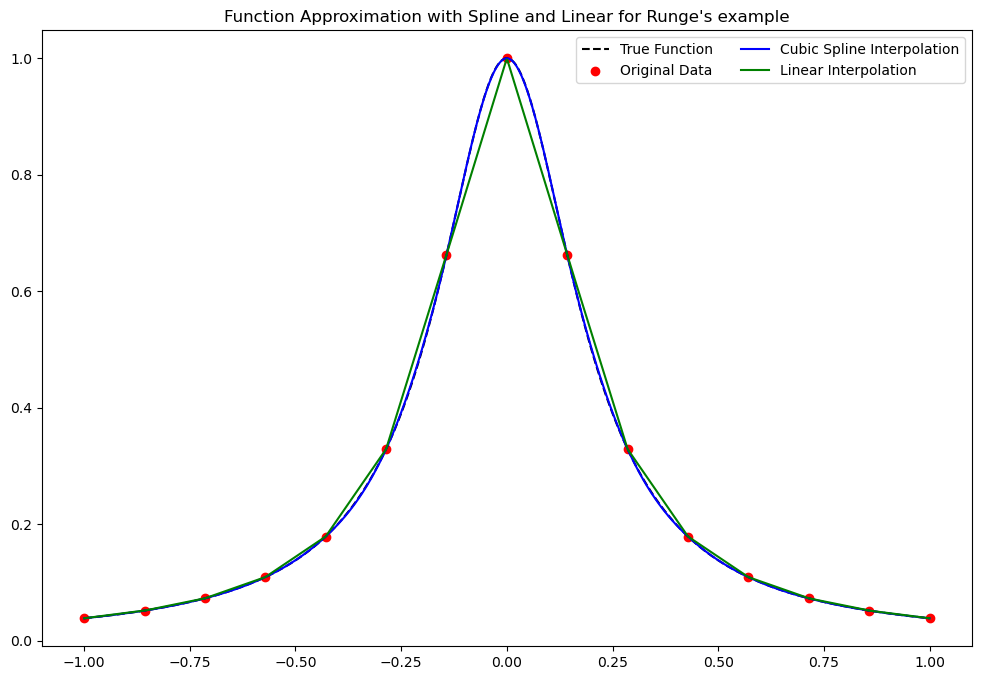

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d, lagrange

plt.rcParams['figure.figsize'] = (12, 8)

# Define the function to be interpolated
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Generate equidistant interpolation points
num_points = 15
x_data = np.linspace(-1, 1, num_points)
y_data = runge_function(x_data)

# Generate points for visualization within the original data range
xs = np.linspace(min(x_data), max(x_data), 1000)

# Perform cubic spline interpolation
cs = CubicSpline(x_data, y_data)
ys_cubic = cs(xs)

#Perform linear interpolation
linear_poly = interp1d(x_data, y_data)
ys_linear = linear_poly(xs)

# Plot the true function
plt.plot(xs, runge_function(xs), label='True Function', color='black', linestyle='--')

# Plot the original data points
plt.scatter(x_data, y_data, label='Original Data', color='red')

# Plot cubic spline interpolation
plt.plot(xs, ys_cubic, label="Cubic Spline Interpolation", color='blue')

# Plot linear interpolation
plt.plot(xs, ys_linear, label="Linear Interpolation", color='green')

plt.legend(loc='upper right', ncol=2)
plt.title("Function Approximation with Spline and Linear for Runge's example")
plt.show()


I added 5 more points and made it 15, to achieve this result. We can conclude, based on the figure, that Runge's phenomenon of polynomials not converging can be avoided by spline.